In [1]:
# Necessary imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Read in the data
train = pd.read_csv('../../data/final_train.csv')
test = pd.read_csv('../../data/final_test.csv')

X_train = train.drop(columns=['booking_status'])
y_train = train['booking_status']
X_test = test.drop(columns=['booking_status'])
y_test = test['booking_status']

# Comparison of how different models performance

## 1. Logistic Regression
Logistic regression will be used as a baseline model. We trained it on the whole training dataset, without any hyperparameter tuning.

In [2]:
# Loading the model
with open('../models/logistic_regression_baseline.pkl', 'rb') as f:
    log_reg = pickle.load(f)

Text(0.5, 1.0, 'Confusion Matrix, Logistic Regression Baseline')

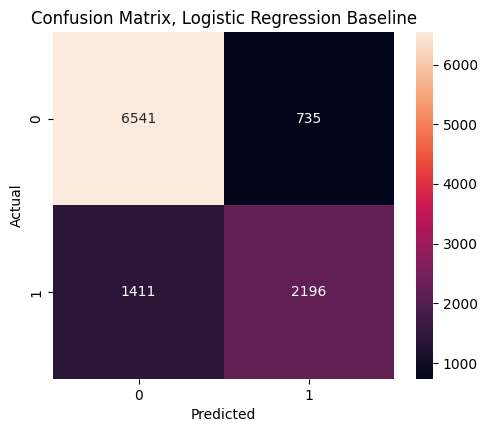

In [3]:
# Making predictions and evaluating the model
y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Logistic Regression Baseline')

In [4]:
# Metrics on test and train data
print(f'Metrics on the test data:\n{classification_report(y_test, y_pred)}')
print(f'Metrics on the train data:\n{classification_report(y_train, y_train_pred)}')

Metrics on the test data:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7276
           1       0.75      0.61      0.67      3607

    accuracy                           0.80     10883
   macro avg       0.79      0.75      0.77     10883
weighted avg       0.80      0.80      0.80     10883

Metrics on the train data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17114
           1       0.73      0.62      0.67      8278

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



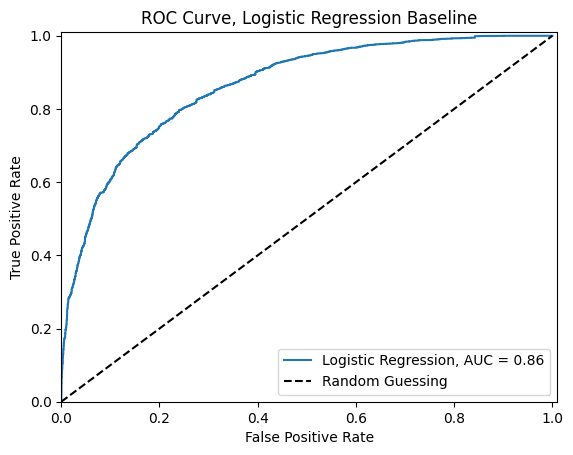

In [5]:
# ROC curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve, Logistic Regression Baseline')
plt.show()

Model's performance is not bad, but we will try to improve it by optimizing hyperparameters and using more advanced models. We will probably want our model to have high recall, because in our business case we want to detect as many cancellations as possible.

In next we will try a few different models, optimize them and compare their performance. We won't use any Deep Learning models, because our problem is not complex enough to use them. While evaluating models we will split training dataset into train and validation sets.

Models that we will try:
- Support Vector Machine
- Random Forest

## 2. SVM
Now we'll try Support Vector Classifier model. I performed hyperparameter tuning using GridSearchCV aiming for highest possible recall.

In [6]:
# Loading model and making predictions on test data
with open('../models/svc_gs.pkl', 'rb') as f:
    svc = pickle.load(f)

y_pred_svc = svc.predict(X_test)
y_train_pred_svc = svc.predict(X_train)

Text(0.5, 1.0, 'Confusion Matrix, SVC')

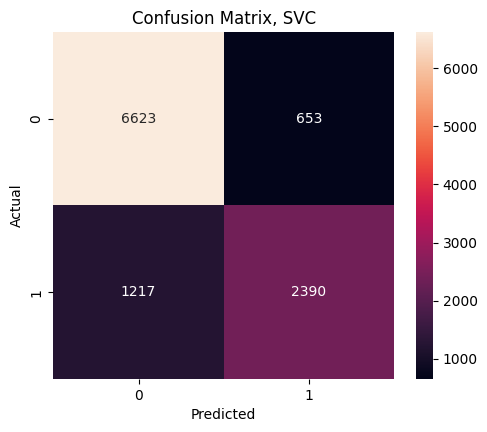

In [7]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, SVC')

In [8]:
print(f'Metrics on the test data:\n{classification_report(y_test, y_pred_svc)}')
print(f'Metrics on the train data:\n{classification_report(y_train, y_train_pred_svc)}')

Metrics on the test data:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7276
           1       0.79      0.66      0.72      3607

    accuracy                           0.83     10883
   macro avg       0.82      0.79      0.80     10883
weighted avg       0.83      0.83      0.82     10883

Metrics on the train data:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     17114
           1       0.78      0.68      0.73      8278

    accuracy                           0.83     25392
   macro avg       0.82      0.80      0.81     25392
weighted avg       0.83      0.83      0.83     25392



We can see that it performs slightly better than the base one, but we will wait until we have tested more models for final conclusions.

## 3. Random Forest
Next we'll test perfmormance of Random Forest Model. This one was also tuned for highest recall with GridSearchCV.

In [9]:
with open('../models/random_forest_gs.pkl', 'rb') as f:
    rand_forest = pickle.load(f)

y_pred_rf = rand_forest.predict(X_test)
y_train_pred_rf = rand_forest.predict(X_train)

Text(0.5, 1.0, 'Confusion Matrix, Random Forest')

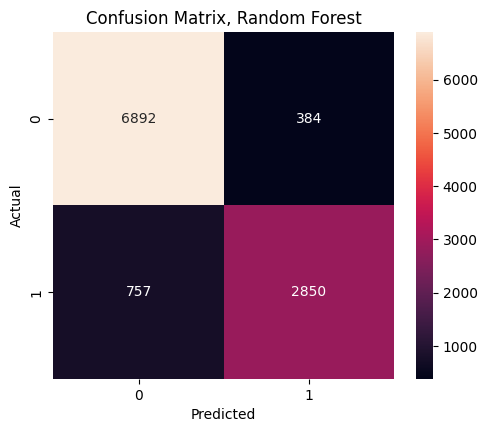

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5.5, 4.5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Random Forest')

In [11]:
print(f'Metrics on the test data:\n{classification_report(y_test, y_pred_rf)}')
print(f'Metrics on the train data:\n{classification_report(y_train, y_train_pred_rf)}')

Metrics on the test data:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7276
           1       0.88      0.79      0.83      3607

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.90      0.89     10883

Metrics on the train data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17114
           1       0.92      0.86      0.89      8278

    accuracy                           0.93     25392
   macro avg       0.93      0.91      0.92     25392
weighted avg       0.93      0.93      0.93     25392



## 4. Comparison of performance (metrics, ROC curve)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create DataFrame with metrics
metrics = {
    'Model': ['Logistic Regression (baseline)', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_svc), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred_svc), recall_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred), f1_score(y_test, y_pred_svc), f1_score(y_test, y_pred_rf)]
}

metrics_df = pd.DataFrame(metrics).set_index('Model').apply(lambda x: round(x, 3))
print("Metrics of different models (predictions made on unseen data)")
metrics_df

Metrics of different models (predictions made on unseen data)


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression (baseline),0.803,0.749,0.609,0.672
Support Vector Machine,0.828,0.785,0.663,0.719
Random Forest,0.895,0.881,0.790,0.833


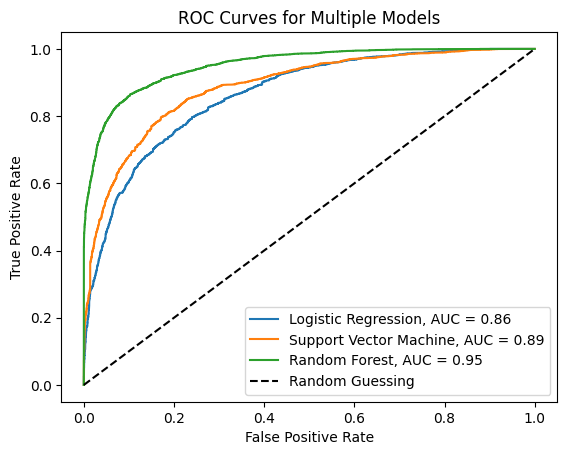

In [13]:
# Compute ROC curve and AUC for each model
y_pred_prob_svc = svc.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rand_forest.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_svc = auc(fpr_svc, tpr_svc)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression, AUC = {auc_logreg:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine, AUC = {auc_svc:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest, AUC = {auc_rf:.2f}')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend()
plt.show()

Random Forest happens to be the best performing model with highest recall, AUC and accuracy. We will use it as our final model. Now we will train it on the whole training dataset and use it to predict test dataset.

## 5. Final Model